In [9]:
import pandas as pd

# Ruta local del archivo CSV
ruta_archivo_csv = r'C:\Users\Lenovo\Documents\1er Semestre 2023\Gestion de la informacion\Panda\Drug1n.csv'

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(ruta_archivo_csv)

# Ver las primeras filas del DataFrame
print(df.head())

# Obtener información sobre el DataFrame
print(df.info())

# Realizar análisis exploratorio de los datos, gráficos, etc.
# Por ejemplo, podemos calcular el rango de edades:
age_range = df['Age'].max() - df['Age'].min()
print("Rango de edades:", age_range)



   Age Sex      BP Cholesterol        Na         K   Drug
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY
1   47   M     LOW        HIGH  0.739309  0.056468  drugC
2   47   M     LOW        HIGH  0.697269  0.068944  drugC
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX
4   61   F     LOW        HIGH  0.559294  0.030998  drugY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB
None
Rango de edades: 59


In [13]:
count_unique_drugs = df['Drug'].nunique()
print("Cantidad de drogas únicas:", count_unique_drugs)


Cantidad de drogas únicas: 5


In [18]:
df_describe = df.describe()
print(df_describe)


              Age          Na           K
count  200.000000  200.000000  200.000000
mean    44.315000    0.697095    0.050174
std     16.544315    0.118907    0.017611
min     15.000000    0.500169    0.020022
25%     31.000000    0.583887    0.035054
50%     45.000000    0.721853    0.049663
75%     58.000000    0.801494    0.066000
max     74.000000    0.896056    0.079788


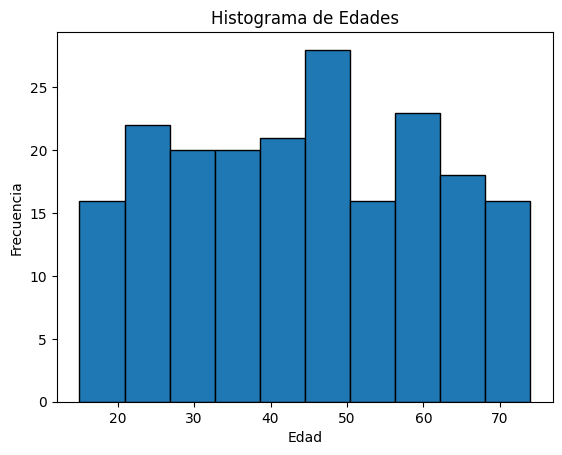

In [17]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=10, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.show()


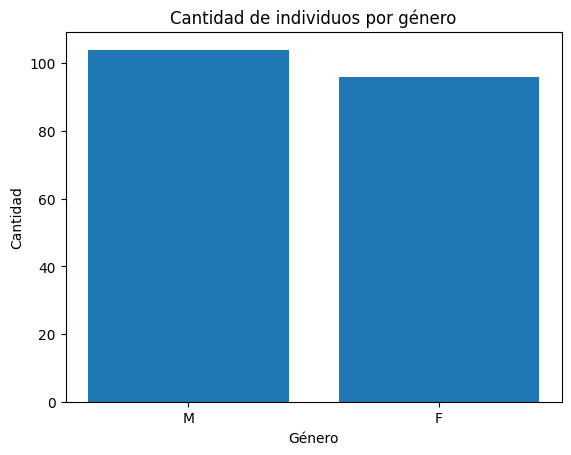

In [19]:
import matplotlib.pyplot as plt

gender_counts = df['Sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Cantidad de individuos por género')
plt.show()


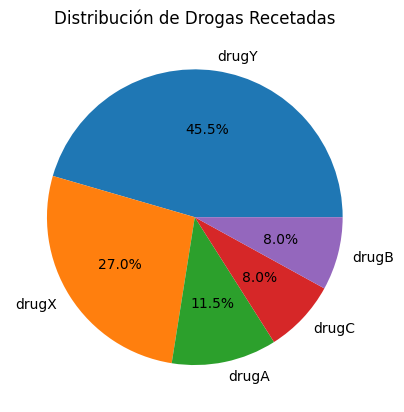

In [20]:
import matplotlib.pyplot as plt

drug_counts = df['Drug'].value_counts()
plt.pie(drug_counts.values, labels=drug_counts.index, autopct='%1.1f%%')
plt.title('Distribución de Drogas Recetadas')
plt.show()


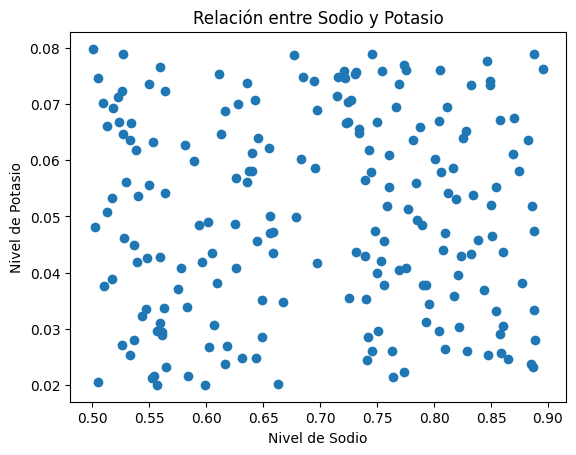

In [21]:
import matplotlib.pyplot as plt

plt.scatter(df['Na'], df['K'])
plt.xlabel('Nivel de Sodio')
plt.ylabel('Nivel de Potasio')
plt.title('Relación entre Sodio y Potasio')
plt.show()


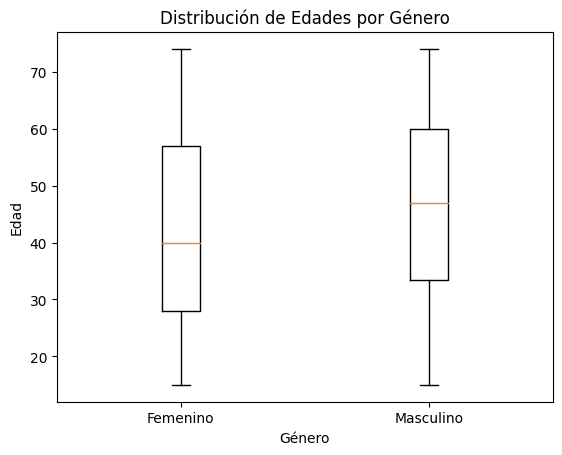

In [22]:
import matplotlib.pyplot as plt

plt.boxplot([df[df['Sex'] == 'F']['Age'], df[df['Sex'] == 'M']['Age']], labels=['Femenino', 'Masculino'])
plt.xlabel('Género')
plt.ylabel('Edad')
plt.title('Distribución de Edades por Género')
plt.show()


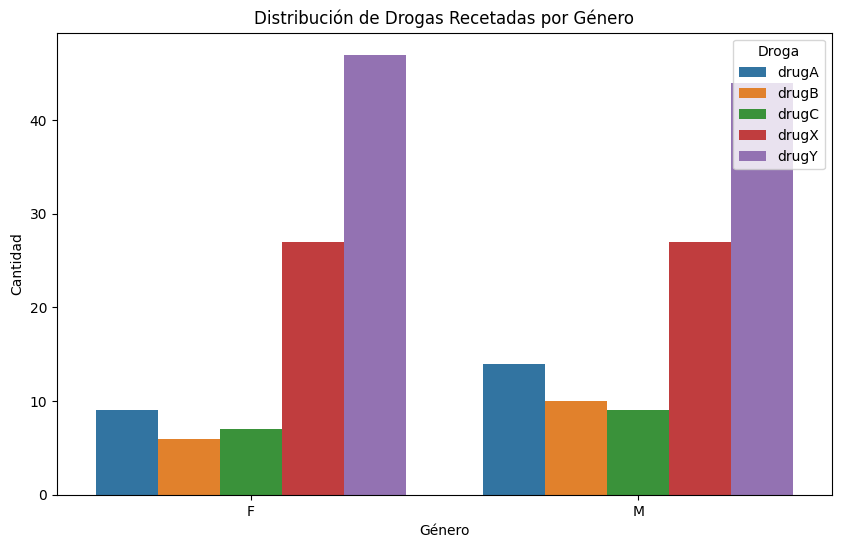

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar el DataFrame por género y droga y contar el número de ocurrencias
grouped_data = df.groupby(['Sex', 'Drug']).size().reset_index(name='Count')

# Crear el gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Count', hue='Drug', data=grouped_data)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de Drogas Recetadas por Género')
plt.legend(title='Droga', loc='upper right')
plt.show()


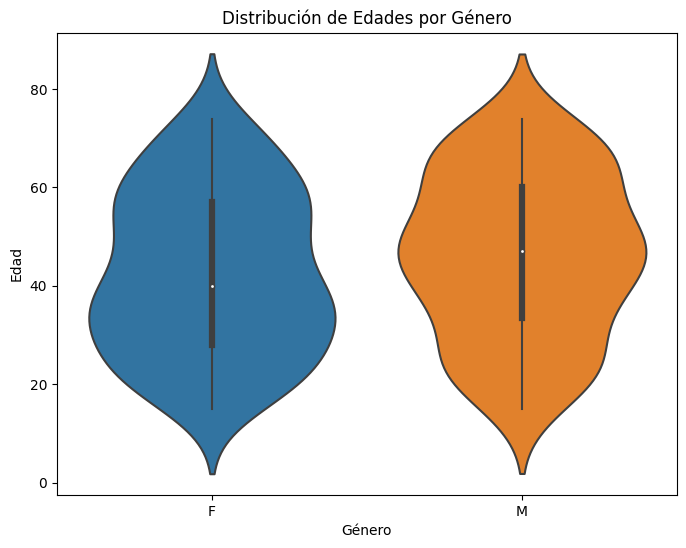

In [26]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sex', y='Age', data=df)
plt.xlabel('Género')
plt.ylabel('Edad')
plt.title('Distribución de Edades por Género')
plt.show()


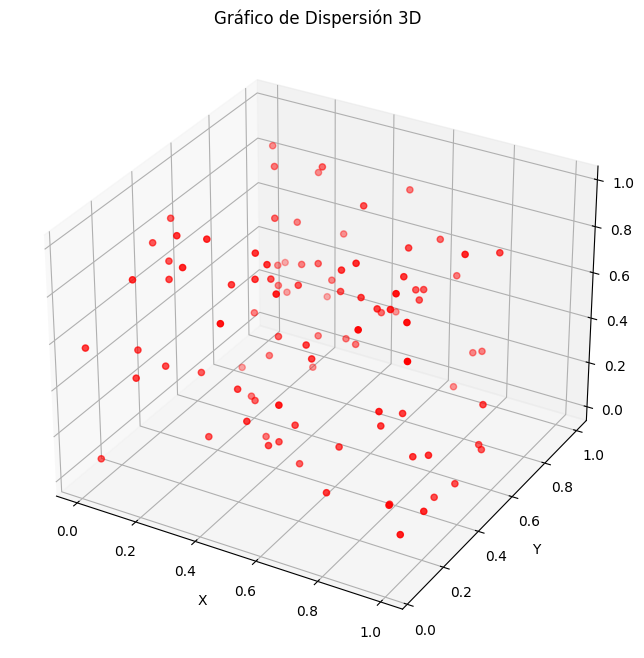

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# Crear datos de ejemplo
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# Crear el gráfico de dispersión 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Gráfico de Dispersión 3D')
plt.show()


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv(r'C:\Users\Lenovo\Documents\1er Semestre 2023\Gestion de la informacion\Panda\Drug1n.csv')

# Dividir los datos en características (X) y etiquetas (y)
X = df[['Age', 'Na', 'K']]
y = df['Drug']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')


Precisión del modelo: 0.575
Matriz de confusión:
[[ 1  2  0  2  1]
 [ 0  1  1  1  0]
 [ 1  1  0  2  1]
 [ 1  1  2  6  1]
 [ 0  0  0  0 15]]
Reporte de clasificación:
              precision    recall  f1-score   support

       drugA       0.33      0.17      0.22         6
       drugB       0.20      0.33      0.25         3
       drugC       0.00      0.00      0.00         5
       drugX       0.55      0.55      0.55        11
       drugY       0.83      1.00      0.91        15

    accuracy                           0.57        40
   macro avg       0.38      0.41      0.39        40
weighted avg       0.53      0.57      0.54        40

